<a href="https://www.kaggle.com/code/bduartea/exchanged-rates?scriptVersionId=101286346" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Exchanged Rates**


## _Descripción del problema_



_Análisis y visualización de series temporales de tipos de cambio de divisas para diferentes monedas en comparación al peso chileno._



### _Configuración de librerías_



Se realiza la instalación de las librerías necesarias para trabajar la importación de datos, análisis estadístico y visualización de algunas relaciones entre los datos. Además, se realiza una configuración general de manejo de mensajes de advertencia y de estilo de gráficos.


In [1]:
# Importar librerías
# ==============================================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime # << Manejo de fechas

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Configuración de estilos de gráficas
# ==============================================================================
sns.set()

## Data Adquisition ##


_El conjunto de datos se obtiene desde un perfil de [Kaggle](https://www.kaggle.com/datasets/ruchi798/currency-exchange-rates)._


In [2]:
# Lectura de datos
# ==============================================================================
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

df = pd.read_csv('/kaggle/input/currency-exchange-rates/exchange_rates.csv', index_col = 0)

/kaggle/input/currency-exchange-rates/exchange_rates.csv


## _Descripción del dataset_


### Conociendo el dataset


_Las variables que se presentan en el data set son: **Country/Currency**: Nombre de la moneda; **currency**: Abreviatura de la moneda; **value**: Valor de la moneda y **date**: Fecha del registro de la moneda._


In [3]:
df.head() # << Indentificando la naturaleza de los datos

,Country/Currency,currency,value,date
0,Australia Dollar,AUD,1.581627,17/12/2021
1,Great Britain Pound,GBP,0.851619,17/12/2021
2,Euro,EUR,1.000000,17/12/2021
3,Japan Yen,JPY,128.301759,17/12/2021
4,Switzerland Franc,CHF,1.041015,17/12/2021


In [4]:
df.info() # << Obtener información rápida de nulos y tipo de datos

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32534 entries, 0 to 32533
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country/Currency  32534 non-null  object 
 1   currency          32534 non-null  object 
 2   value             32534 non-null  float64
 3   date              32534 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.2+ MB


_Un aspecto importante que se aprecia es que los valores de moneda 'EUR' son todos 1, puesto que se usan como referencia para todas las demás monedas. A continuación un ejemplo de cómo se compara el valor de 'EUR' con 'USD' para algunos días del dataset._

In [5]:
df[(df['currency'] == 'EUR') | (df['currency'] == 'USD')].head()

,Country/Currency,currency,value,date
2,Euro,EUR,1.000000,17/12/2021
5,USA Dollar,USD,1.132548,17/12/2021
152,Euro,EUR,1.000000,18/12/2021
155,USA Dollar,USD,1.123810,18/12/2021
302,Euro,EUR,1.000000,19/12/2021


### Transformando el dataset


_Debemos notar que  que la variable 'date' es de tipo objeto, y para aprovechar las bondandes de python en el manejo de fechas debemos cambiar el tipo a un formato fecha._


In [6]:
df['date']= pd.to_datetime(df['date'], format='%d/%m/%Y', dayfirst=True) # << Transformamos la columna objeto 'date' en un datetime

In [7]:
df.info() # << Validamos los cambios

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32534 entries, 0 to 32533
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Country/Currency  32534 non-null  object        
 1   currency          32534 non-null  object        
 2   value             32534 non-null  float64       
 3   date              32534 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 1.2+ MB



_Una mejor forma de trabajar estos datos es creando una tabla de tipo tydi, que me deje cada columna como una de las monedas. Por comodidad, utilizamos las abreviaciones como encabezado de cada columna. Otro aspecto imporante es considerar que no se definen indices en la tabla para poder usarlos en las visualizaciones de más adelante._


In [8]:
df_t = pd.pivot_table(data = df, values='value', index='date', columns='currency', aggfunc='mean', fill_value=None).reset_index().sort_values(by = 'date') # << generamos una versión tidy de la tabla
df_t.head() # << damos un vistazo a como nos queda

currency,date,AED,AFN,ALL,AMD,ANG,AOA,ARS,AUD,AWG,...,VND,VUV,WST,XAF,XCD,XOF,XPF,YER,ZAR,ZMK
0,2021-12-17,4.159826,115.810550,120.855126,557.922979,2.041220,637.752325,115.479548,1.581627,2.038586,...,26028.778038,128.264034,2.944818,656.407756,3.060767,656.419356,119.879862,283.420014,17.916108,10194.285784
1,2021-12-18,4.127870,115.710400,120.749546,557.435576,2.039455,638.337406,115.278973,1.577277,2.023419,...,25827.954997,127.274423,2.922097,655.845906,3.037152,655.845906,119.629945,281.233771,17.895601,10115.639348
2,2021-12-19,4.127870,115.710400,120.749546,557.435576,2.039455,638.337406,115.278973,1.577277,2.023419,...,25827.954997,127.274423,2.922097,655.845906,3.037152,655.845906,119.629945,281.233771,17.895601,10115.639348
3,2021-12-20,4.130046,115.791262,120.836080,557.835056,2.040916,638.675520,115.297976,1.579708,2.024491,...,25841.635331,127.341837,2.923645,656.315910,3.038761,656.301310,119.692469,281.381656,17.924248,10120.993621
4,2021-12-21,4.144655,115.205690,120.848019,555.298905,2.031689,638.882903,115.244211,1.586287,2.031087,...,25828.655251,127.792212,2.933985,656.114937,3.049508,656.112029,119.777911,282.377947,17.822899,10156.785954


_Crearé un método (simple) para seleccionar algunas monedas de mi interes, particularmente las de ámerica para comparar su evolución versus el peso chileno. Para esto creo una lista que tenga definida las monedas que deseo estudiar, y luego creo un diccionario que me permita obtener la abreviación para cada una._

In [9]:
lista = ['Euro', 'USA Dollar', 'Argentina Peso', 'Bahamas Dollar', 'Barbados Dollar', 'Bolivia Boliviano', 'Brazil Real', 'Chili Peso', 'Colombia Peso', 'Costa Rica Colon', 'Cuba Convertible Peso', 'Cuba Peso', 'Dominican Republich Peso', 'El Salvador Colon', 'Guatemala Quetzal', 'Guyana Dollar', 'Haiti Gourde', 'Honduras Lempira', 'Jamaica Dollar', 'Mexico Peso',  'Nicaragua Cordoba Oro', 'Panama Balboa', 'Paraguay Guarani', 'Peru Nuevo Sol', 'Trinidad/Tobago Dollar', 'Uruguay Peso']
dicts = {lista[i]: ' '.join(df[df['Country/Currency'] == lista[i]]['currency'].unique()) for i in range(len(lista))}

In [10]:
dicts # << damos un vistazo para ver cómo quedo el diccionario.

{'Euro': 'EUR',
 'USA Dollar': 'USD',
 'Argentina Peso': 'ARS',
 'Bahamas Dollar': 'BSD',
 'Barbados Dollar': 'BBD',
 'Bolivia Boliviano': 'BOB',
 'Brazil Real': 'BRL',
 'Chili Peso': 'CLP',
 'Colombia Peso': 'COP',
 'Costa Rica Colon': 'CRC',
 'Cuba Convertible Peso': 'CUC',
 'Cuba Peso': 'CUP',
 'Dominican Republich Peso': 'DOP',
 'El Salvador Colon': 'SVC',
 'Guatemala Quetzal': 'GTQ',
 'Guyana Dollar': 'GYD',
 'Haiti Gourde': 'HTG',
 'Honduras Lempira': 'HNL',
 'Jamaica Dollar': 'JMD',
 'Mexico Peso': 'MXN',
 'Nicaragua Cordoba Oro': 'NIO',
 'Panama Balboa': 'PAB',
 'Paraguay Guarani': 'PYG',
 'Peru Nuevo Sol': 'PEN',
 'Trinidad/Tobago Dollar': 'TTD',
 'Uruguay Peso': 'UYU'}

_Modificamos el dataset, para obtener las visualizaciones anteriores pero a nivel de 'USD', para ello solamente realizamos la transformación del dataset, multiplicando los valores de las monedas por el inverso del valor de 'USD'. Para esto utilizamos la función 'mul' de pandas._

*** 
### Visualización de Series de tiempo
***

#### a. Series de tiempo del valor de 1 Euro en las diferentes monedas

_Utilizaremos la información tal como está en el dataset original. En este archivo se presenta cuanto vale 1 EUR en las diferentes monedas._

In [11]:
df_t_eur = df_t # << Copiamos la información del dataset original para ir generando diferentes escenarios.

_Desarrollamos un ciclo que nos ayude a realizar todos los gráficos de una sola vez. La base de esta técnica es utilizar la tabla en formato tidy y el diccionario que generamos anteriormente para así llamar los datos de una forma iterativa. Además aprovechamos en cada iteración parametrizar los títulos y agregar algo de formato._

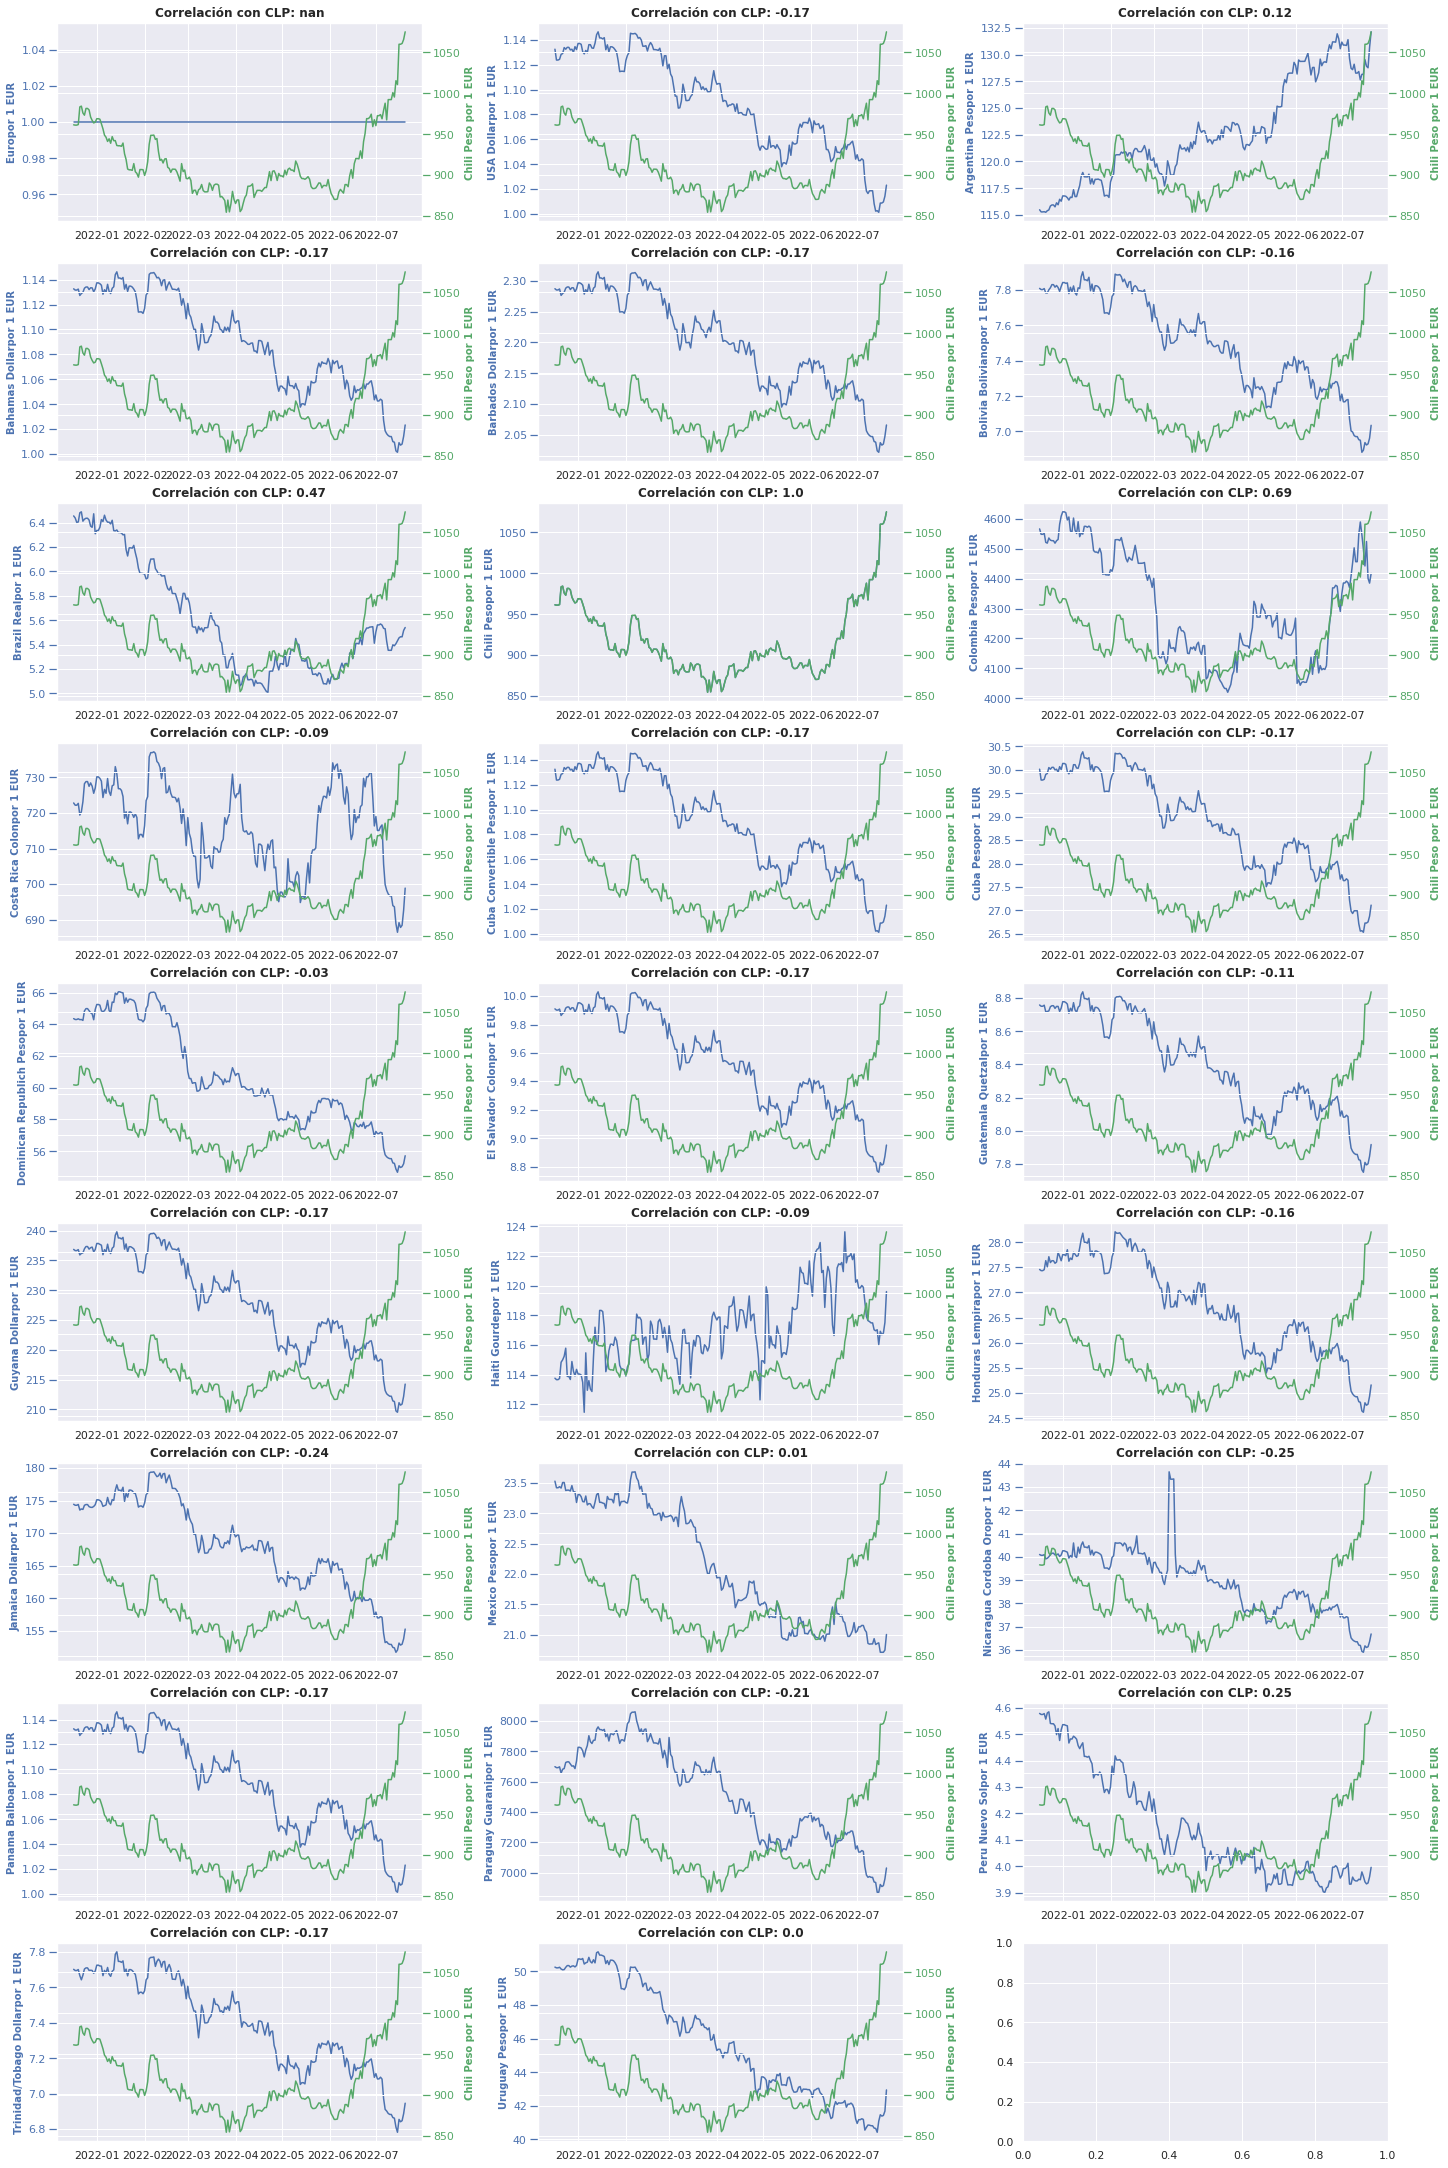

In [12]:
fig, axs = plt.subplots(9, 3, figsize=(20, 30), constrained_layout=True, sharex = False)
for ax, m in zip(axs.flat, dicts):
    ax2 = ax.twinx() # << Usar eje secundario
    ax.plot('date', dicts[m], data = df_t_eur, color = 'b')
    ax.set_ylabel(m + 'por 1 EUR', color='b', size = 10, weight='bold')
    ax.tick_params(axis='y', size = 8, colors='b')
    ax2.plot('date', dicts['Chili Peso'], data = df_t_eur, color = 'g')
    ax2.set_xlabel('date', size = 10)
    ax2.set_ylabel('Chili Peso por 1 EUR', color='g', size = 10, weight='bold')
    ax2.tick_params(axis='y', size = 8, colors='g')
    plt.title('Correlación con CLP: '+str(round(df_t_eur[dicts['Chili Peso']].corr(df_t_eur[dicts[m]]),2)), weight='bold')

#### b. Series de tiempo del valor de 1 Dolar en las diferentes monedas

_Realizamos una transformación en la cual dividimos todos los resultados del dataset en la cantidad de dolares por euro registrado. Con esto logramos transformar los datos a dolares. En otras palabras el dataset 'df_t_usd' corresponde a cuánto vale 1 USD en cada moneda._

In [13]:
df_t_eur = df_t.set_index('date') 
df_t_usd = df_t_eur.mul(1/df_t_eur['USD'], axis = 0).reset_index()
df_t_eur = df_t_eur.reset_index()
df_t_usd.tail(3)

currency,date,AED,AFN,ALL,AMD,ANG,AOA,ARS,AUD,AWG,...,VND,VUV,WST,XAF,XCD,XOF,XPF,YER,ZAR,ZMK
212,2022-07-18,3.673046,87.851146,116.129071,412.933140,1.799305,431.915163,127.539107,1.467799,1.797501,...,23455.007824,118.896065,2.720971,651.074163,2.702551,651.074163,113.150069,250.249916,17.079570,9001.202374
213,2022-07-19,3.673101,87.985121,115.319492,415.049642,1.802134,429.255133,128.842590,1.468548,1.797501,...,23447.501666,118.896033,2.720971,645.792276,2.702550,645.824067,113.150087,250.250180,17.143200,9001.202236
214,2022-07-20,3.673102,89.141405,114.022946,415.349962,1.802442,430.075168,129.141936,1.449318,1.797500,...,23417.007695,118.896064,2.720971,639.153860,2.702551,639.163202,113.150011,250.250227,17.088944,9001.201051


_Utilizamos el mismo procedimiento anterior, pero considerando el nuevo dataset._

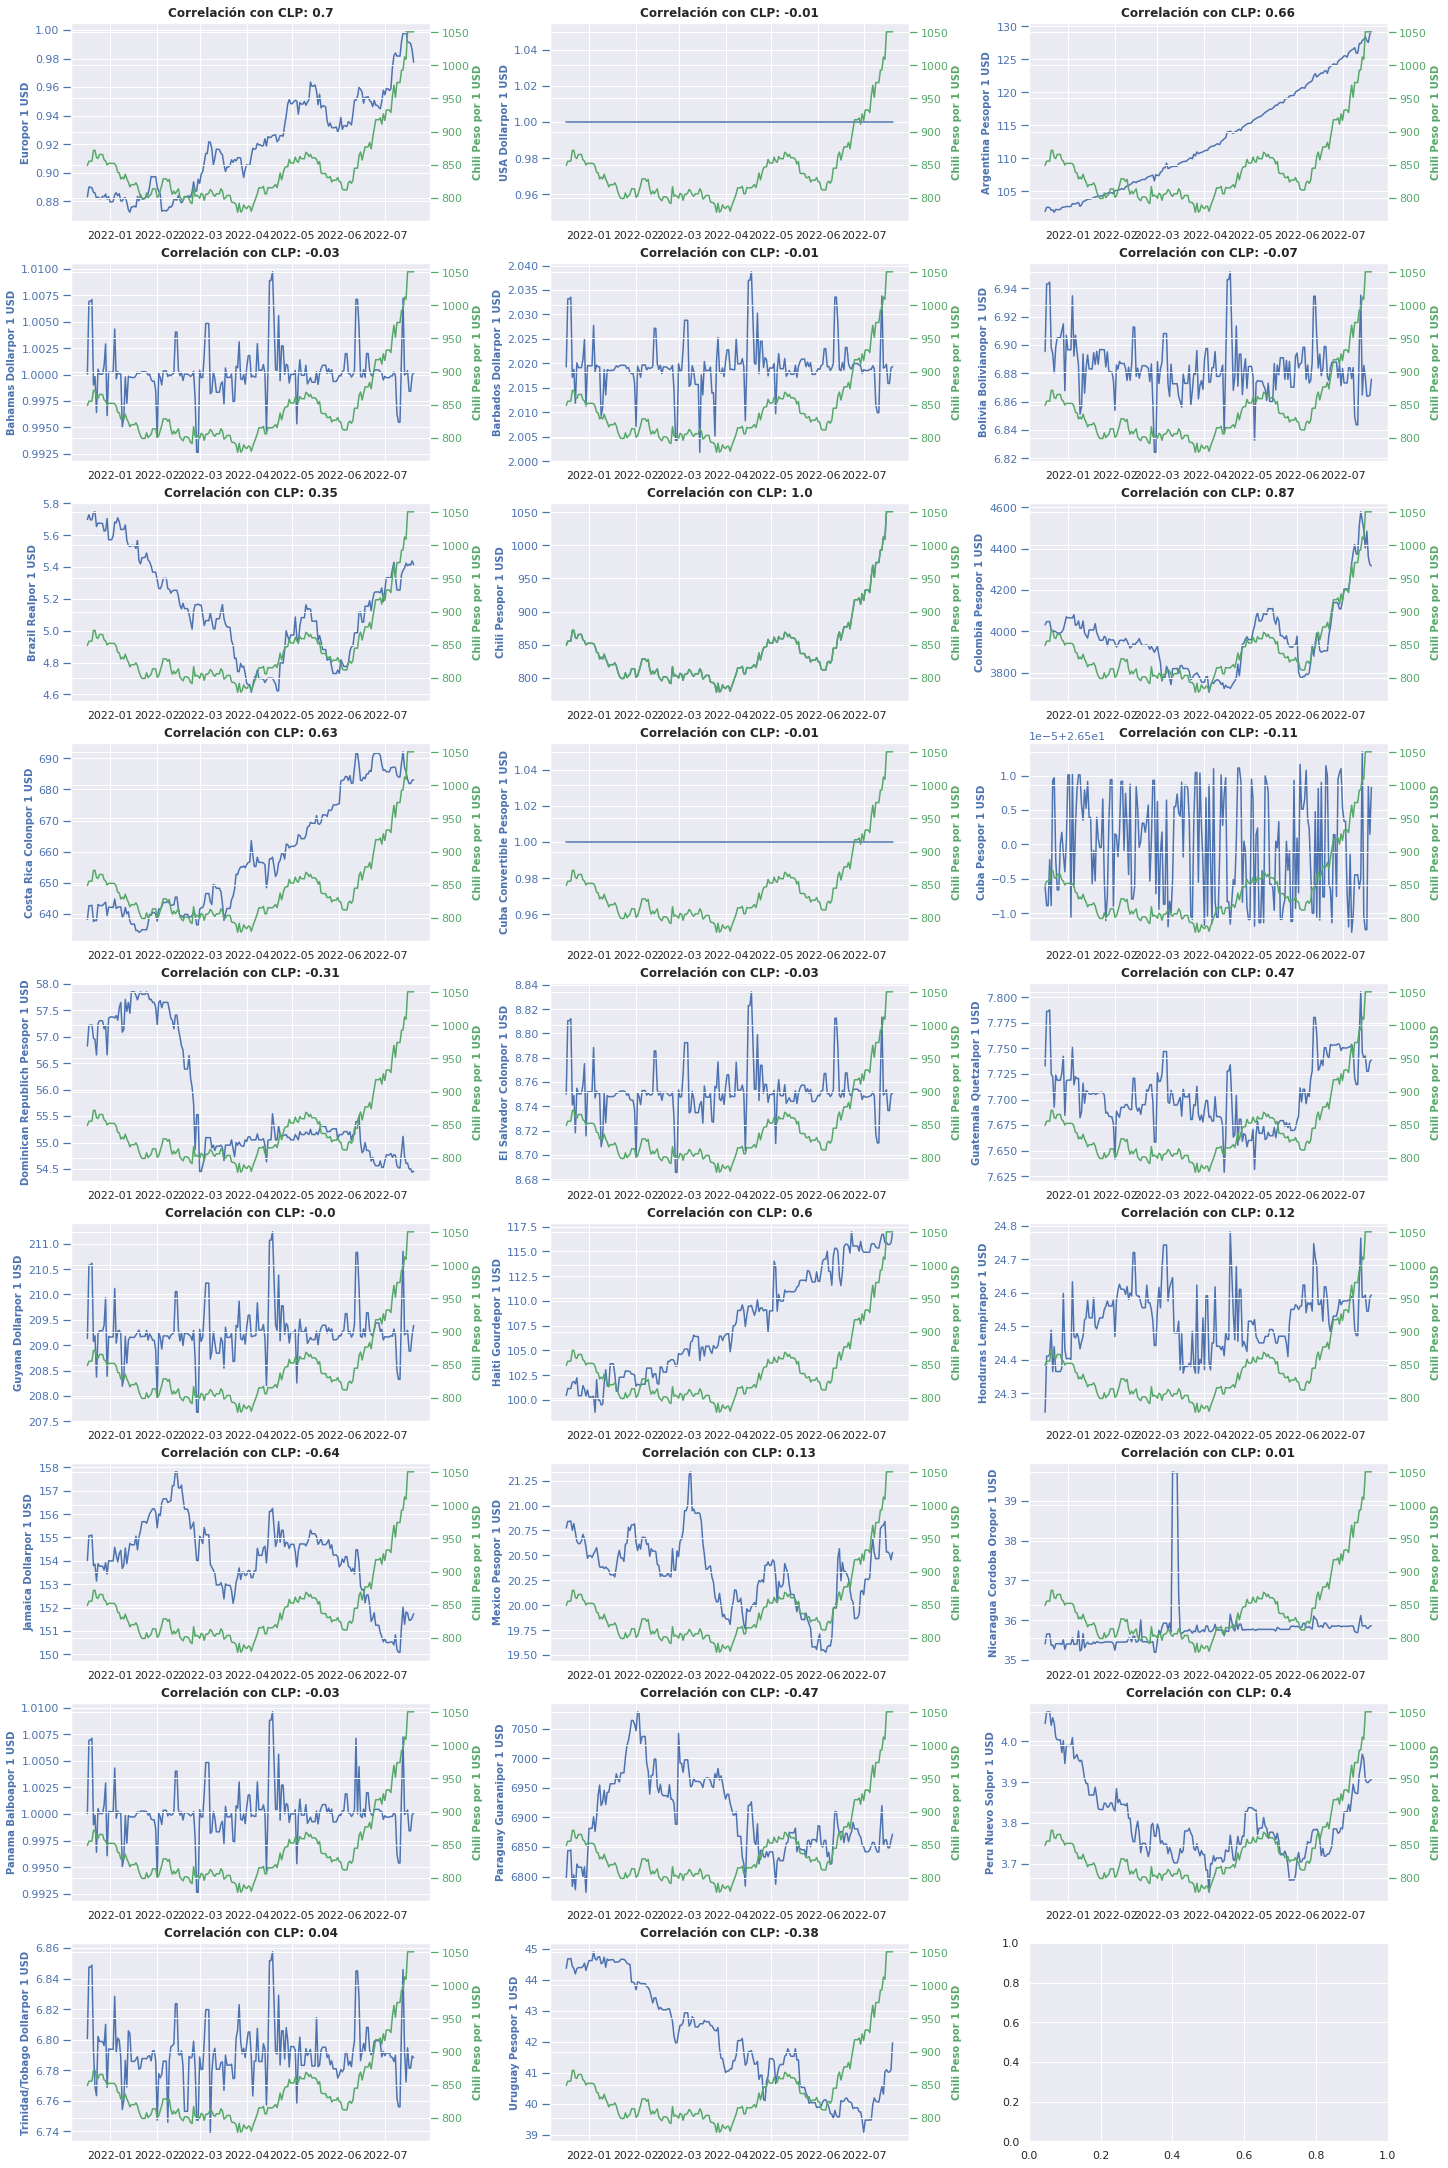

In [14]:
fig, axs = plt.subplots(9, 3, figsize=(20, 30), constrained_layout=True, sharex = False)
for ax, m in zip(axs.flat, dicts):
    ax2 = ax.twinx()
    ax.plot('date', dicts[m], data = df_t_usd, color = 'b')
    ax.set_ylabel(m + 'por 1 USD', color='b', size = 10, weight='bold')
    ax.tick_params(axis='y', size = 8, colors='b')
    ax2.plot('date', dicts['Chili Peso'], data = df_t_usd, color = 'g')
    ax2.set_xlabel('date', size = 10)
    ax2.set_ylabel('Chili Peso por 1 USD', color='g', size = 10, weight='bold')
    ax2.tick_params(axis='y', size = 8, colors='g')
    plt.title('Correlación con CLP: '+str(round(df_t_usd[dicts['Chili Peso']].corr(df_t_usd[dicts[m]]),2)), weight='bold')

#### c. Series de tiempo del valor de las diferentes monedas en pesos chilenos

_Finalmente reviso cuánto sale cada moneda en pesos chilenos para evaluar el deterioro del valor de este último._

In [15]:
df_t_aux = df_t
df_t_aux = df_t_aux.set_index('date')
df_t_inv = 1/df_t_aux
df_t_clp = df_t_inv.mul(df_t_aux['CLP'], axis = 0).reset_index()
df_t_clp.tail(3)

currency,date,AED,AFN,ALL,AMD,ANG,AOA,ARS,AUD,AWG,...,VND,VUV,WST,XAF,XCD,XOF,XPF,YER,ZAR,ZMK
212,2022-07-18,286.070628,11.960580,9.048127,2.544602,583.975677,2.432771,8.238654,715.868064,584.561989,...,0.044799,8.837556,386.167575,1.613872,388.799520,1.613872,9.286345,4.198805,61.520906,0.116734
213,2022-07-19,286.068940,11.942474,9.111730,2.531649,583.064438,2.447868,8.155378,715.509706,584.567269,...,0.044813,8.837637,386.171005,1.627087,388.803149,1.627007,9.286427,4.198838,61.293108,0.116736
214,2022-07-20,286.068957,11.787569,9.215342,2.529819,582.964922,2.443202,8.136477,725.003311,584.567633,...,0.044872,8.837639,386.171081,1.643987,388.803165,1.643963,9.286437,4.198839,61.487734,0.116736


_Acá la gráfica contempla cuánto vale cada moneda en pesos chilenos. Se puede apreciar que en el último mes las monedas de los países seleccionados tienen un mayor valor, es decir existe un deterioro del peso chileno._

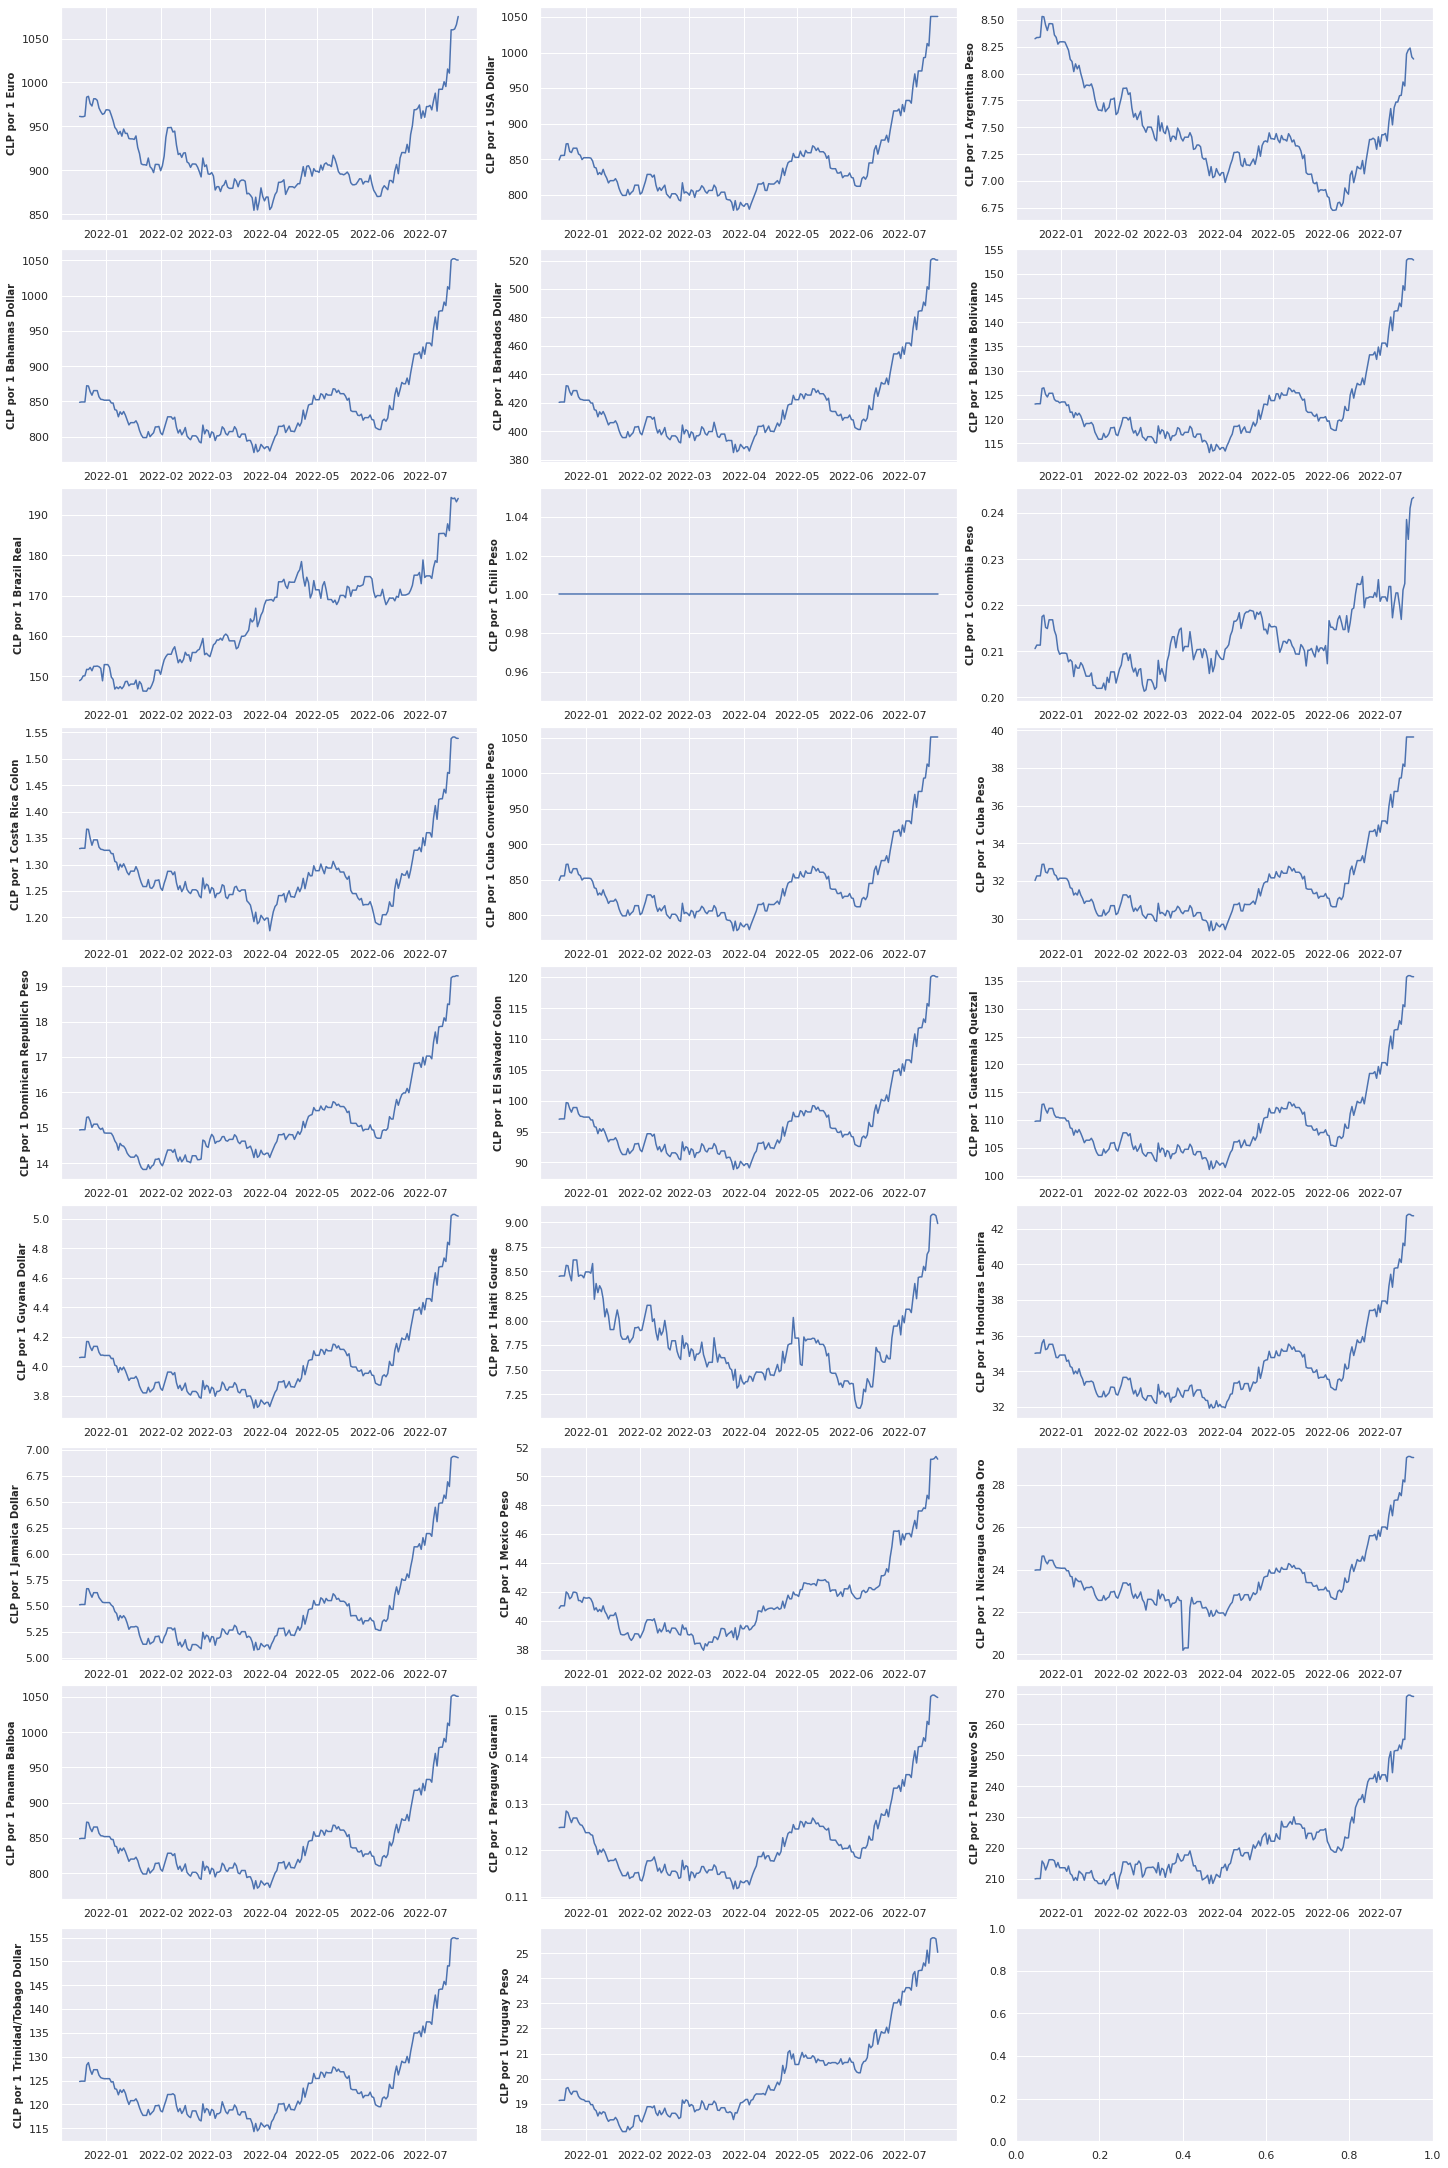

In [16]:
fig, axs = plt.subplots(9, 3, figsize=(20, 30), constrained_layout=True, sharex = False)
for ax, m in zip(axs.flat, dicts):
    ax.plot('date', dicts[m], data = df_t_clp)
    ax.set_ylabel('CLP por 1 '+ m, size = 10, weight='bold')
    ax.tick_params(axis='y', size = 8)